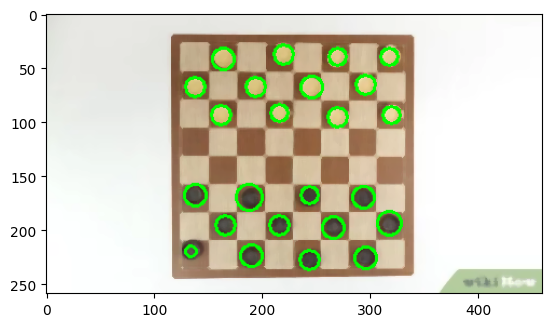

In [86]:
import os
import cv2
import numpy as np 
import matplotlib.pyplot as plt

cimg=cv2.imread(os.path.relpath('data/checkerboards/checkerBoard_Pieces_Above.jpg'), cv2.IMREAD_COLOR)
#cimg=cv2.imread(os.path.relpath('data/checkerboards/checkerboard_with_pieces_tilted.jpg'), cv2.IMREAD_COLOR)
assert cimg is not None,"no img"
cimg=cv2.medianBlur(cimg,5)
cimg=cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB)  
im=cv2.cvtColor(cimg,cv2.COLOR_RGB2GRAY)

circles=cv2.HoughCircles(im, cv2.HOUGH_GRADIENT,1,10,param1=90,param2=17, minRadius=0, maxRadius=20)

#circles=np.uint16(np.around(circles))

'''
for i in circles[0,:]:
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
'''

circles = np.round(circles[0, :]).astype("int")

for (x, y, r) in circles:
        # Draw the circle in the output image (optional for visualization)
        #cv2.circle(cimg, (x, y), r, (0, 255, 0), 2)

        # Extract the region of interest (ROI) around each checker
        roi = cimg[y - r:y + r, x - r:x + r]

        # Convert ROI to HSV or LAB to later use as a sample
        #hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
        
        # (Optional) Save the ROI for further processing
        cv2.imwrite(f"checker_sample_{x}_{y}.png", roi)

        cv2.circle(cimg, (x, y), r, (0, 255, 0), 2)

plt.imshow(cimg)


In [ ]:
cimg=cv2.imread(os.path.relpath('data/checkerboards/checkerBoard_Pieces_Above.jpg'), cv2.IMREAD_COLOR)
assert cimg is not None,"no img"
cimg=cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB)  
im=cv2.cvtColor(cimg,cv2.COLOR_RGB2GRAY)

sampleChecker= cv2.imread(('data/checker_sample_138_68.png'))
assert sampleChecker is not None,"no img"
hsv_sample_checker=cv2.cvtColor(sampleChecker,cv2.COLOR_BGR2HSV)

checker_hist = cv2.calcHist([hsv_sample_checker], [0, 1], None, [180, 256], [0, 180, 0, 256])
cv2.normalize(checker_hist, checker_hist, 0, 1, cv2.NORM_MINMAX)



#change
